# Load Data

## 표고(톱밥)

In [1]:
import os
import pandas as pd
import numpy as np


def load_data(path):
    years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
    use_cols = ['labch', 'labh_hour', 'lab_cost',
                'fmtc', 'lansh',
                'size', 'ara', 'de2',# catecorical variable
                'cony'] # dependent variable

    dataframe_list = []

    # 2014
    print('-'*10)
    ## 노지
    file_path1 = os.path.join(path, str(years[4])+'년', str(years[4])+'년 임산물생산비조사_통합 데이터_5. 표고(톱밥배지)(엑셀1).xlsx')
    file_path2 = os.path.join(path, str(years[4])+'년', str(years[4])+'년 임산물생산비조사_통합 데이터_5. 표고(톱밥배지)(엑셀2).xlsx')

    forest_data1 = pd.read_excel(file_path1)
    forest_data2 = pd.read_excel(file_path2)
    forest_2014 = pd.concat([forest_data1, forest_data2], axis=1)

    dataframe_list.append(forest_2014.loc[:,use_cols])
    print(2014, forest_2014.shape, '톱밥')
    
    # 2015-2016
    for year in years[5:7]:
        print('-'*10)
        file_path1 = os.path.join(path, str(year)+'년', str(year)+'년 임산물생산비조사_통합 데이터_5. 표고_톱밥(엑셀1).xlsx')
        file_path2 = os.path.join(path, str(year)+'년', str(year)+'년 임산물생산비조사_통합 데이터_5. 표고_톱밥(엑셀2).xlsx')

        forest_data1 = pd.read_excel(file_path1)
        forest_data2 = pd.read_excel(file_path2)
        forest_data = pd.concat([forest_data1, forest_data2], axis=1)

        dataframe_list.append(forest_data.loc[:,use_cols])
        print(year, forest_data.shape, '톱밥')

    
    # 2017-2018
    for year in years[7:9]:
        print('-'*10)
        file_path1 = os.path.join(path, str(year)+'년', str(year)+'년 임산물생산비조사_통합 데이터_5. 표고_톱밥(엑셀 1).xls')
        file_path2 = os.path.join(path, str(year)+'년', str(year)+'년 임산물생산비조사_통합 데이터_5. 표고_톱밥(엑셀 2).xls')

        forest_data1 = pd.read_excel(file_path1)
        forest_data2 = pd.read_excel(file_path2)
        forest_data = pd.concat([forest_data1, forest_data2], axis=1)

        dataframe_list.append(forest_data.loc[:,use_cols])
        print(year, forest_data.shape, '톱밥')


    # 2019
    print('-'*10)
    file_path = os.path.join(path, str(years[9])+'년', str(years[9])+'년 임산물생산비조사_통합 데이터_5. 표고톱밥.xlsx')
    forest_2019 = pd.read_excel(file_path)
    dataframe_list.append(forest_2019.loc[:,use_cols])
    print(2019, forest_2019.shape, '톱밥')
    

    data = pd.concat(dataframe_list, axis=0)
    data = data.reset_index(drop=True)
    
    return data
    
data = load_data('./임산물생산비조사 마이크로데이터(2010-2019)')

----------
2014 (13, 403) 톱밥
----------
2015 (14, 403) 톱밥
----------
2016 (17, 403) 톱밥
----------
2017 (19, 403) 톱밥
----------
2018 (44, 403) 톱밥
----------
2019 (39, 419) 톱밥


In [2]:
data

,labch,labh_hour,lab_cost,fmtc,lansh,size,ara,de2,cony
0,1.444833e+05,14.465116,31063912,4.159076e+05,6046.511628,2,31,1,20.000000
1,7.366528e+04,8.053658,44206536,1.603243e+05,3332.777870,3,31,1,20.000000
2,5.692729e+04,7.027397,8311384,2.447171e+05,4520.547945,1,31,2,20.000000
3,3.260197e+04,4.311395,133027446,1.144202e+05,857.769554,3,99,2,20.000000
4,6.202576e+04,6.238282,20511918,1.891691e+05,7257.332930,2,37,2,20.000000
...,...,...,...,...,...,...,...,...,...
141,3.191748e+06,299.000000,3191748,2.361267e+07,850000.000000,1,99,2,513.000000
142,5.113139e+06,404.642857,14316788,2.706152e+07,214285.714286,2,99,2,2323.928571
143,2.077156e+06,156.000000,2077156,2.403706e+07,600000.000000,1,99,2,1634.000000
144,6.254585e+06,436.000000,18763756,3.037899e+07,500000.000000,2,99,1,6065.666667


In [3]:
print(np.sum(data['cony'] == 0))
data.drop(data[data['cony'] == 0].index, inplace=True)
print(data.shape)

0
(146, 9)


In [4]:
data.isnull().sum()

labch        0
labh_hour    0
lab_cost     0
fmtc         0
lansh        0
size         0
ara          0
de2          0
cony         0
dtype: int64

In [5]:
data.fillna(data.mean(), inplace=True)
data.isnull().sum()

labch        0
labh_hour    0
lab_cost     0
fmtc         0
lansh        0
size         0
ara          0
de2          0
cony         0
dtype: int64

In [6]:
for column in data.columns:
    if len(data[column].value_counts()) <= 10:
        print(data[column].value_counts())
        print()

2    58
1    48
3    40
Name: size, dtype: int64

34    31
36    30
37    30
99    28
33    16
31    11
Name: ara, dtype: int64

1    96
2    50
Name: de2, dtype: int64



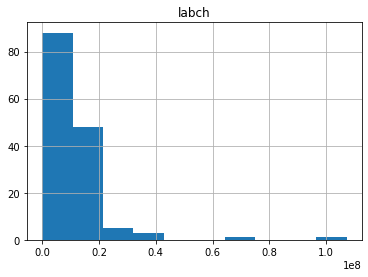

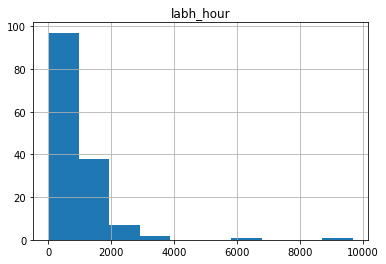

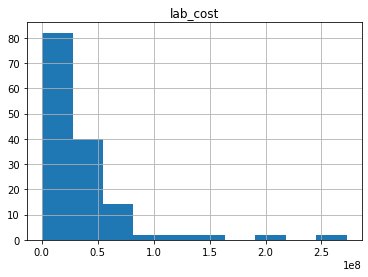

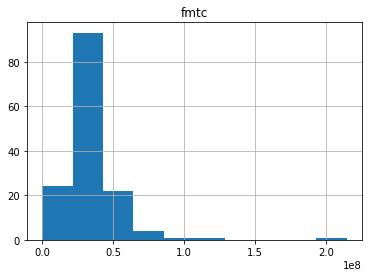

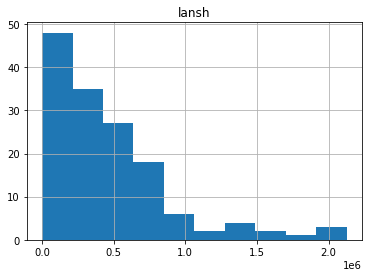

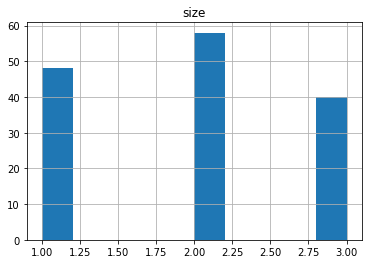

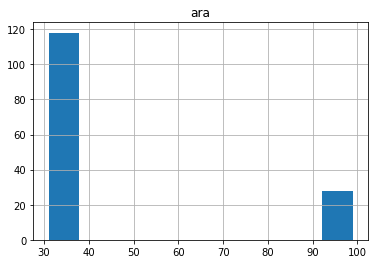

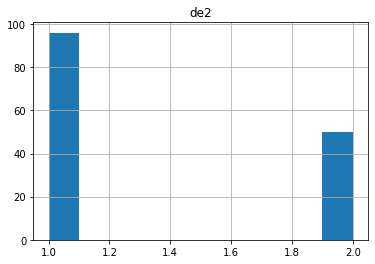

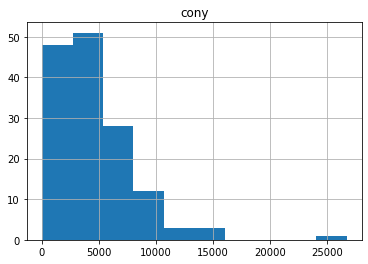

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

for column in data.columns:
    data[column].hist()
    plt.title(column)
    plt.show()

## Log Transform

In [8]:
data.loc[:, ['fmtc', 'lansh']] = np.log1p(data.loc[:, ['fmtc', 'lansh']])
data.loc[:, ['labch', 'labh_hour', 'lab_cost']] = np.log1p(data.loc[:, ['labch', 'labh_hour', 'lab_cost']])

In [9]:
data['cony'] = np.log1p(data['cony'])

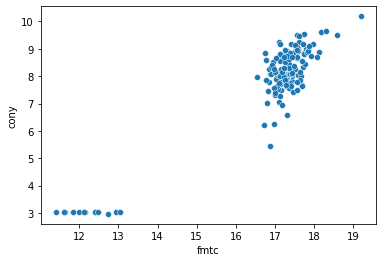

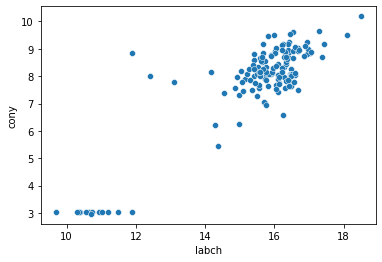

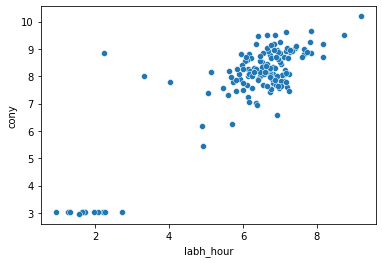

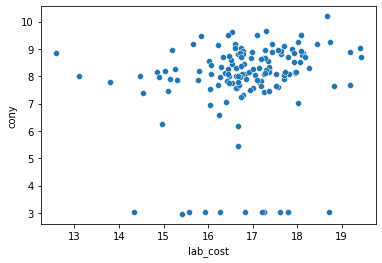

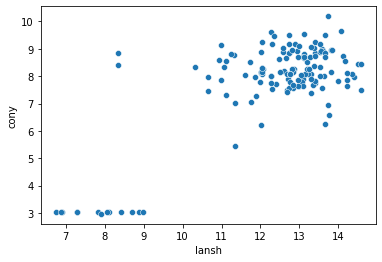

In [10]:
import seaborn as sns

sns.scatterplot(x='fmtc', y='cony', data=data)
plt.show()

sns.scatterplot(x='labch', y='cony', data=data)
plt.show()

sns.scatterplot(x='labh_hour', y='cony', data=data)
plt.show()

sns.scatterplot(x='lab_cost', y='cony', data=data)
plt.show()

sns.scatterplot(x='lansh', y='cony', data=data)
plt.show()

## NaN Check

In [11]:
data.replace({'labch' : {0 : np.nan},
              'labh_hour' : {0 : np.nan},
              'lab_cost' : {0 : np.nan},
              'lansh' : {0 : np.nan}},
             inplace=True)

In [12]:
data.isnull().sum()

labch        0
labh_hour    0
lab_cost     0
fmtc         0
lansh        0
size         0
ara          0
de2          0
cony         0
dtype: int64

In [13]:
data.dropna(axis=0, inplace=True)

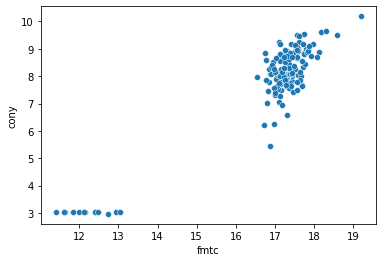

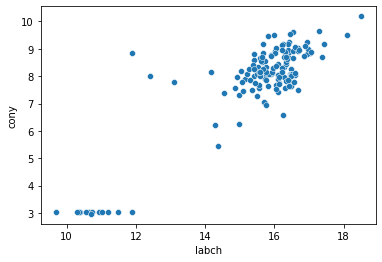

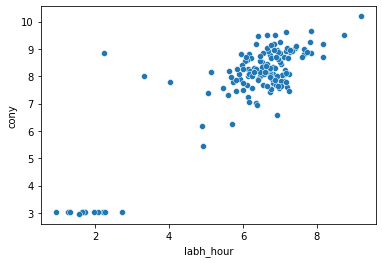

In [14]:
sns.scatterplot(x='fmtc', y='cony', data=data)
plt.show()

sns.scatterplot(x='labch', y='cony', data=data)
plt.show()

sns.scatterplot(x='labh_hour', y='cony', data=data)
plt.show()

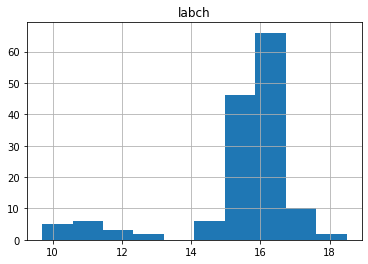

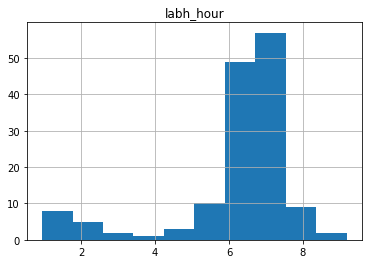

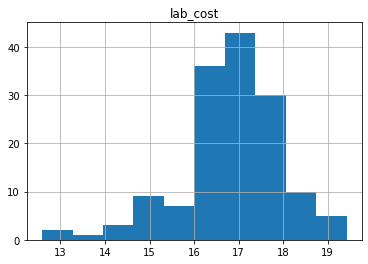

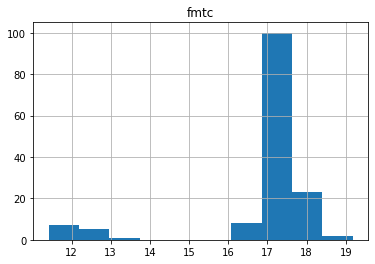

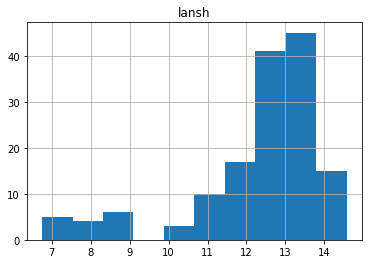

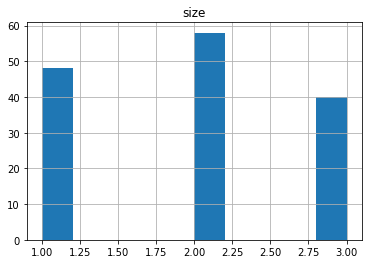

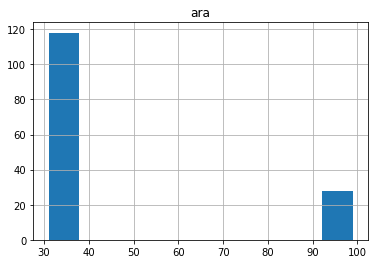

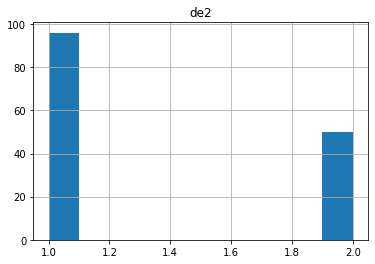

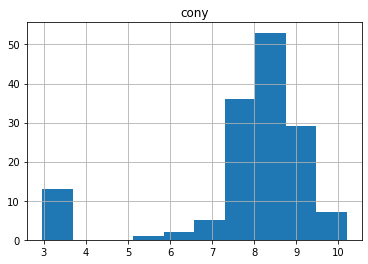

In [15]:
for column in data.columns:
    data[column].hist()
    plt.title(column)
    plt.show()

## Categorical Variable processing

In [16]:
from sklearn.preprocessing import OneHotEncoder

categorical_variables = ['size', 'ara', 'de2']
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
onehot_encoder.fit(data.loc[:, categorical_variables])
onehot = onehot_encoder.fit_transform(data.loc[:, categorical_variables])
print(onehot_encoder.categories_)
print(onehot.toarray().shape)

[array([1, 2, 3]), array([31, 33, 34, 36, 37, 99]), array([1, 2])]
(146, 11)


## Numerical Variable processing

In [17]:
from sklearn.preprocessing import MinMaxScaler

numerical_variables = ['labch', 'labh_hour', 'lab_cost',
                       'fmtc', 'lansh']
X_minmax_scaler = MinMaxScaler()
X_minmax_scaler.fit(data.loc[:, numerical_variables])
X_scaled = X_minmax_scaler.transform(data.loc[:, numerical_variables])
X_scaled

array([[0.24827672, 0.21733309, 0.68219656, 0.19637546, 0.2498024 ],
       [0.1716558 , 0.15224716, 0.73383513, 0.07369022, 0.1735857 ],
       [0.14233795, 0.13762234, 0.48923636, 0.12811799, 0.21258707],
       [0.07893827, 0.08741695, 0.89507423, 0.03027719, 0.        ],
       [0.15209418, 0.12504365, 0.62145242, 0.09498269, 0.27315899],
       [0.10909786, 0.09025898, 0.76012014, 0.05460124, 0.02015142],
       [0.1162066 , 0.09481729, 0.68195925, 0.09116067, 0.06789884],
       [0.09950946, 0.08331882, 0.76071523, 0.02590771, 0.0689526 ],
       [0.07378436, 0.04004456, 0.43644005, 0.12801005, 0.2866747 ],
       [0.20359678, 0.15893147, 0.53837879, 0.21087936, 0.13765826],
       [0.11457551, 0.07609042, 0.41301718, 0.16956455, 0.14711082],
       [0.06697458, 0.04474342, 0.67715295, 0.        , 0.01674983],
       [0.        , 0.        , 0.25544542, 0.13905622, 0.16816733],
       [0.77138134, 0.75950656, 0.73004708, 0.75655242, 0.79651109],
       [0.8338309 , 0.83782234, 0.

In [18]:
numeric_data_df = pd.DataFrame(X_scaled, columns=numerical_variables)
onehot_data_df = pd.DataFrame(onehot.toarray())

X_data_df = pd.concat([numeric_data_df , onehot_data_df], axis=1)
X_data_df

,labch,labh_hour,lab_cost,fmtc,lansh,0,1,2,3,4,5,6,7,8,9,10
0,0.248277,0.217333,0.682197,0.196375,0.249802,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.171656,0.152247,0.733835,0.073690,0.173586,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.142338,0.137622,0.489236,0.128118,0.212587,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.078938,0.087417,0.895074,0.030277,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.152094,0.125044,0.621452,0.094983,0.273159,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0.600332,0.577785,0.349164,0.716206,0.882734,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
142,0.653933,0.614459,0.568826,0.733752,0.706389,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
143,0.551471,0.499070,0.286294,0.718499,0.838158,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
144,0.676853,0.623510,0.608415,0.748635,0.814825,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [19]:
X_data = np.array(X_data_df)
y_data = np.array(data['cony'])

# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.1,
                                                    random_state=1234)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(131, 16) (131,)
(15, 16) (15,)


# Modeling

## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt = DecisionTreeRegressor(random_state=1000)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1000)

In [22]:
dt_pred = dt.predict(X_test)
print(dt_pred[:10])

[8.95165451 3.04452244 8.08931322 8.8472161  8.14743301 7.39939808
 7.56060116 7.68371057 6.95822901 9.52639122]


In [23]:
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_rmse

0.6952257500930187

## RandomForest

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 3000, max_features = 'sqrt', 
                           random_state = 1000)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=3000, random_state=1000)

In [25]:
rf_pred = rf.predict(X_test)
print(rf_pred[:10])

[8.63000016 3.10716193 8.0897124  6.98040428 8.23992207 7.47686556
 8.04632825 8.21700758 7.82106967 8.85880783]


In [26]:
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_rmse

0.5155032417762937

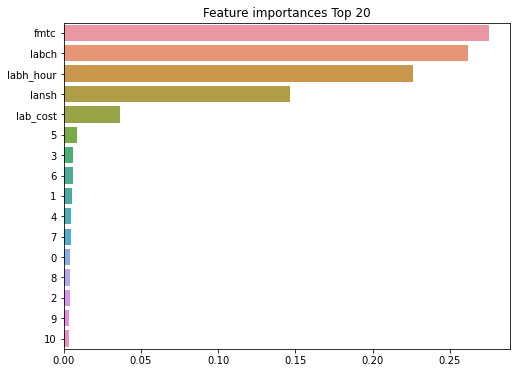

In [27]:
import seaborn as sns

importances_values = rf.feature_importances_ 
importances = pd.Series(importances_values, index=X_data_df.columns)

top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

## Ridge

In [28]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1724)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1724)

In [29]:
print(ridge.score(X_train, y_train))

0.8931410400101387


In [30]:
ridge_pred = ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_rmse

0.5229098955596523

## LASSO

In [31]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [32]:
print(lasso.score(X_train, y_train))

0.8952775235687582


In [33]:
lasso_pred = lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_rmse

0.4621198505321152

## GBM

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators=500, max_depth=8)
gbm.fit(X_train, y_train)

gbm_pred = gbm.predict(X_test)
print(gbm_pred[:10])

[8.80363357 3.04453602 8.07945375 8.47844241 8.16061423 7.77465067
 7.9293338  7.69774156 7.28010648 8.94373719]


In [35]:
gbm_rmse = np.sqrt(mean_squared_error(y_test, gbm_pred))
gbm_rmse

0.608708717792562

## AdaBoost

In [36]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators = 500, learning_rate = 0.1)
ada.fit(X_train, y_train)

ada_pred = ada.predict(X_test)
print(ada_pred[:10])

[8.35560211 3.04452244 8.0194403  8.14220879 8.35560211 7.92628095
 8.15995619 8.45165731 8.08396569 8.67401676]


In [37]:
ada_rmse = np.sqrt(mean_squared_error(y_test, ada_pred))
ada_rmse

0.4483087802180754

## XGBoost

In [38]:
import xgboost as xgb
print(xgb.__version__)

xgb_reg = xgb.XGBRegressor(learning_rate=0.08, max_depth=8, 
                           gamma=0, n_estimators=3000,
                           subsample=0.7, colsample_bytree=0.8)
xgb_reg.fit(X_train, y_train, verbose=False)

xgb_pred = xgb_reg.predict(X_test)
print(xgb_pred[:10])

1.3.3
[8.697969  2.9679167 8.09922   8.169661  8.4123745 7.025362  8.02921
 8.3320675 7.8519135 9.174475 ]


In [39]:
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_rmse

0.45354387418749476

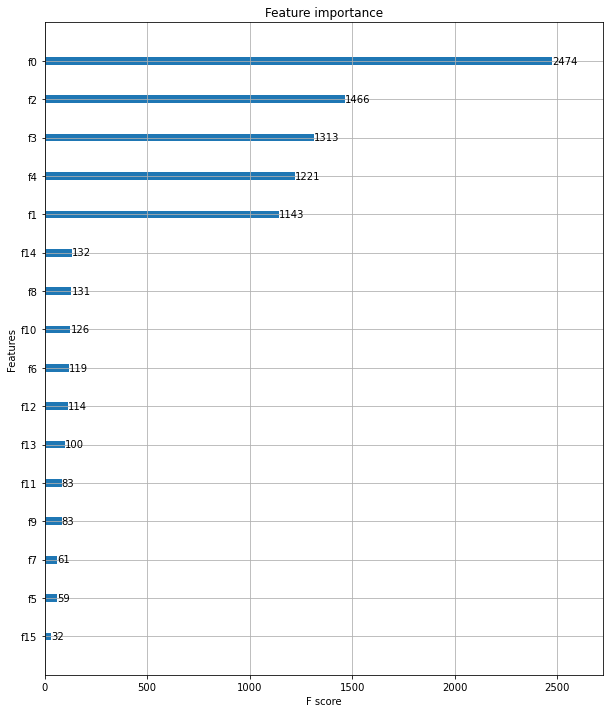

In [40]:
from xgboost import plot_importance

plot_importance(xgb_reg, max_num_features=20)

fig = plt.gcf()
fig.set_size_inches(10, 12)

## LightGBM

In [41]:
import lightgbm as lgb


lgb_reg = lgb.LGBMRegressor(n_estimators=1000, max_depth=50, num_leaves=10, min_data_in_leaf=10)
lgb_reg.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000,
        verbose = False)

LGBMRegressor(max_depth=50, min_data_in_leaf=10, n_estimators=1000,
              num_leaves=10)

In [42]:
lgb_pred = lgb_reg.predict(X_test)
print(lgb_pred[:10])

[8.743539   3.06591557 8.24919657 7.12027319 8.7140416  7.4224688
 7.96814341 8.35702929 7.43438155 9.19489836]


In [43]:
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))
lgb_rmse

0.556672556060223

# Model Comparison

In [44]:
model_result = pd.DataFrame({
    'Model': ['Decision Tree', 'RandomForest', 'Ridge', 'LASSO',
              'GBM', 'AdaBoost', 'XGboost', 'LightGBM'],
    'RMSE': [dt_rmse, rf_rmse, ridge_rmse, lasso_rmse,
             gbm_rmse, ada_rmse, xgb_rmse, lgb_rmse]})
model_result.sort_values(by='RMSE', ascending=True)

,Model,RMSE
5,AdaBoost,0.448309
6,XGboost,0.453544
3,LASSO,0.462120
1,RandomForest,0.515503
2,Ridge,0.522910
7,LightGBM,0.556673
4,GBM,0.608709
0,Decision Tree,0.695226


# Ensemble

In [45]:
import torch
from sklearn.metrics import mean_squared_error

class EnsembleRegressor:
    def __init__(self, models, weights=None):
        
        self.models = models
        self.weights = weights
        
    def predict(self, X_test):
        pred_list = []
        for i, model in enumerate(models.values()):
            pred_list.append(model.predict(X_test))
        preds = np.array(pred_list)
            
        prediction = np.average(preds, axis=0, weights=self.weights)

        return prediction
    
    def random_search(self, X_test, y_test, num_search):
        weights = torch.softmax(torch.rand(num_search, len(self.models)), axis=1).numpy()
        
        pred_list = []
        for i, model in enumerate(models.values()):
            pred_list.append(model.predict(X_test))
        preds = np.array(pred_list)

        mse = []
        for i in range(num_search):
            prediction = np.average(preds, axis=0, weights=weights[i])
            mse_ = mean_squared_error(y_test, prediction)
            mse.append(mse_)
        
        result = pd.DataFrame(weights)
        result['RMSE'] = np.sqrt(mse)

        return result.sort_values('RMSE', ascending=True)

In [48]:
models = {'AdaBoost' : ada, 'LASSO' : lasso, 'XGBoost' : xgb_reg}

ensemble = EnsembleRegressor(models, weights=None)
result = ensemble.random_search(X_test, y_test, 30000)
result.head(10)

,0,1,2,RMSE
28541,0.386979,0.184175,0.428846,0.419870
15353,0.385456,0.184336,0.430207,0.419870
14707,0.386650,0.186761,0.426589,0.419870
3319,0.382759,0.187138,0.430103,0.419870
6948,0.385137,0.188684,0.426179,0.419870
24384,0.382892,0.189411,0.427697,0.419871
3221,0.389661,0.184922,0.425417,0.419871
4483,0.386265,0.188653,0.425081,0.419871
24460,0.380422,0.189613,0.429965,0.419871
3072,0.390699,0.184452,0.424849,0.419871


In [49]:
optimal_weight = np.round(result.iloc[0,:-1], 3).tolist()
print(optimal_weight)

[0.387, 0.184, 0.429]


In [50]:
ensemble = EnsembleRegressor(models, weights=optimal_weight)

preds = ensemble.predict(X_test)
print(preds[:10])

[8.52790853 3.01064636 8.04125105 8.03136747 8.33592893 7.4840773
 8.07258449 8.38655604 7.92884998 8.88182871]


In [51]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
rmse

0.4198695250158501

# Evaluation

In [52]:
inverse_transformed_pred = np.expm1(preds)
inverse_transformed_pred = np.where(inverse_transformed_pred < 0, 0, inverse_transformed_pred)
inverse_transformed_y_test = np.expm1(y_test)

print(inverse_transformed_pred[:10])
print(inverse_transformed_y_test[:10])

[5052.8647552    19.30051712 3105.49713951 3074.94507069 4170.07440764
 1778.48148074 3204.37540605 4386.68063635 2775.23225624 7198.94530638]
[ 9538.75          20.          5894.62962963  3049.
  3043.33333333  2450.          3190.88008291 13164.70588235
  3255.          9837.90322581]


In [53]:
np.sqrt(mean_squared_error(inverse_transformed_y_test, inverse_transformed_pred))

2942.5483320390626

In [54]:
inverse_transformed_pred = pd.Series(np.round(inverse_transformed_pred,1), name='예측값')
inverse_transformed_y_test= pd.Series(np.round(inverse_transformed_y_test,1), name='생산량')
result = pd.concat([inverse_transformed_y_test, inverse_transformed_pred], axis=1)
result[:30]

,생산량,예측값
0,9538.7,5052.9
1,20.0,19.3
2,5894.6,3105.5
3,3049.0,3074.9
4,3043.3,4170.1
5,2450.0,1778.5
6,3190.9,3204.4
7,13164.7,4386.7
8,3255.0,2775.2
9,9837.9,7198.9


# 2018-2019 Prediction

In [55]:
import os
import pandas as pd
import numpy as np


def load_data(path, year):
    use_cols = ['labch', 'labh_hour', 'lab_cost',
                'fmtc', 'lansh',
                'size', 'ara', 'de2',# catecorical variable
                'cony'] # dependent variable
    
    # 2018
    if year == 2018:
        file_path1 = os.path.join(path, '2018년/2018년 임산물생산비조사_통합 데이터_5. 표고_톱밥(엑셀 1).xls')
        file_path2 = os.path.join(path, '2018년/2018년 임산물생산비조사_통합 데이터_5. 표고_톱밥(엑셀 2).xls')
        forest_data1 = pd.read_excel(file_path1)
        forest_data2 = pd.read_excel(file_path2)
        forest_2018 = pd.concat([forest_data1, forest_data2], axis=1)
        data = forest_2018.loc[:,use_cols]
        print(2018, data.shape)
        
    elif year == 2019:
        file_path = os.path.join(path, '2019년/2019년 임산물생산비조사_통합 데이터_5. 표고톱밥.xlsx')
        forest_2019 = pd.read_excel(file_path).loc[:,use_cols]
        data = forest_2019
        print(2019, data.shape)
    else:
        print('year must be in 2018, 2019')
    
    return data

In [56]:
data = load_data('./임산물생산비조사 마이크로데이터(2010-2019)', 2018)

2018 (44, 9)


In [57]:
data.loc[:, ['fmtc', 'lansh']] = np.log1p(data.loc[:, ['fmtc', 'lansh']])
data.loc[:, ['labch', 'labh_hour', 'lab_cost']] = np.log1p(data.loc[:, ['labch', 'labh_hour', 'lab_cost']])

In [58]:
data['cony'] = np.log1p(data['cony'])

In [59]:
data.replace({'labch' : {0 : np.nan},
              'labh_hour' : {0 : np.nan},
              'lab_cost' : {0 : np.nan},
              'lansh' : {0 : np.nan}},
             inplace=True)

In [60]:
if data.isnull().sum().sum() > 0:
    print(data.isnull().sum().sum())
    data.fillna(data.mean(), inplace=True)

In [61]:
from sklearn.preprocessing import OneHotEncoder

categorical_variables = ['size', 'ara', 'de2']
onehot = onehot_encoder.transform(data.loc[:, categorical_variables])
print(onehot_encoder.categories_)
print(onehot.toarray().shape)

[array([1, 2, 3]), array([31, 33, 34, 36, 37, 99]), array([1, 2])]
(44, 11)


In [62]:
from sklearn.preprocessing import MinMaxScaler

X_scaled = X_minmax_scaler.transform(data.loc[:, numerical_variables])
X_scaled

array([[0.64185152, 0.61251267, 0.638141  , 0.73801095, 0.75720883],
       [0.69079907, 0.6642532 , 0.46557031, 0.68885222, 0.79402599],
       [0.77014711, 0.75021788, 0.68957143, 0.78337813, 0.77613945],
       [0.71565657, 0.69221149, 0.65834473, 0.79087299, 0.76546838],
       [0.76637708, 0.73702429, 0.89981796, 0.73136176, 0.67676048],
       [0.67913014, 0.65514852, 0.56595195, 0.74434107, 0.67963651],
       [0.74522941, 0.72535079, 0.53560709, 0.75984982, 0.89493181],
       [0.81391643, 0.80684376, 0.81860281, 0.83671141, 0.9418649 ],
       [0.72791257, 0.70843579, 0.74887776, 0.75356948, 0.83708729],
       [0.76803462, 0.76382138, 0.56495108, 0.76046068, 0.97144233],
       [0.66702807, 0.64236823, 0.59577331, 0.72839932, 0.76546838],
       [0.25013175, 0.15809703, 0.        , 0.68665828, 0.20469075],
       [0.72752415, 0.70177093, 0.68168212, 0.77694444, 0.75841429],
       [0.72895734, 0.69307782, 0.61611645, 0.81695522, 1.        ],
       [0.76062354, 0.71699861, 0.

In [63]:
numeric_data_df = pd.DataFrame(X_scaled, columns=numerical_variables)
onehot_data_df = pd.DataFrame(onehot.toarray())

X_data_df = pd.concat([numeric_data_df , onehot_data_df], axis=1)
X_data_df

,labch,labh_hour,lab_cost,fmtc,lansh,0,1,2,3,4,5,6,7,8,9,10
0,0.641852,0.612513,0.638141,0.738011,0.757209,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.690799,0.664253,0.465570,0.688852,0.794026,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.770147,0.750218,0.689571,0.783378,0.776139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.715657,0.692211,0.658345,0.790873,0.765468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.766377,0.737024,0.899818,0.731362,0.676760,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.679130,0.655149,0.565952,0.744341,0.679637,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6,0.745229,0.725351,0.535607,0.759850,0.894932,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7,0.813916,0.806844,0.818603,0.836711,0.941865,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8,0.727913,0.708436,0.748878,0.753569,0.837087,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,0.768035,0.763821,0.564951,0.760461,0.971442,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [64]:
X_test = np.array(X_data_df)
y_test = np.array(data['cony'])

In [65]:
ensemble = EnsembleRegressor(models, weights=optimal_weight)

preds = ensemble.predict(X_test)
print(preds[:10])

[7.79844317 7.89466228 8.35506648 8.99962115 8.77031718 8.13680943
 7.19053178 8.78412615 7.99314142 7.89469342]


In [66]:
inverse_transformed_pred = np.expm1(preds)
inverse_transformed_pred = np.where(inverse_transformed_pred < 0, 0, inverse_transformed_pred)
inverse_transformed_y_test = np.expm1(y_test)

print(inverse_transformed_pred[:10])
print(inverse_transformed_y_test[:10])

[2435.80534098 2681.92333644 4250.66726119 8099.01466528 6439.21484649
 3416.99510363 1325.80859426 6528.76442302 2959.5827977  2682.00690613]
[ 1827.8         2565.          3810.43478261 13303.33333333
 10353.2         3870.45454545   719.          6125.3968254
  2713.6         3186.        ]


In [67]:
print(np.sqrt(mean_squared_error(inverse_transformed_y_test, inverse_transformed_pred)))

1998.2963324072264


In [68]:
inverse_transformed_pred = pd.Series(np.round(inverse_transformed_pred,1), name='예측값')
inverse_transformed_y_test= pd.Series(np.round(inverse_transformed_y_test,1), name='생산량')
result = pd.concat([inverse_transformed_y_test, inverse_transformed_pred], axis=1)
result[:30]

,생산량,예측값
0,1827.8,2435.8
1,2565.0,2681.9
2,3810.4,4250.7
3,13303.3,8099.0
4,10353.2,6439.2
5,3870.5,3417.0
6,719.0,1325.8
7,6125.4,6528.8
8,2713.6,2959.6
9,3186.0,2682.0


# Prediction

In [71]:
def prediction(file_path):
    use_cols = ['fno',
                'labch', 'labh_hour', 'lab_cost',
                'fmtc', 'lansh',
                'size', 'ara', 'de2']
    
    data = pd.read_csv(file_path).loc[:,use_cols]
    
    # log transform
    data.loc[:, ['fmtc', 'lansh']] = np.log1p(data.loc[:, ['fmtc', 'lansh']])
    data.loc[:, ['labch', 'labh_hour', 'lab_cost']] = np.log1p(data.loc[:, ['labch', 'labh_hour', 'lab_cost']])
    
    # data imputation
    data.replace({'labch' : {0 : np.nan},
              'labh_hour' : {0 : np.nan},
              'lab_cost' : {0 : np.nan},
              'lansh' : {0 : np.nan},},
              inplace=True)
    if data.isnull().sum().sum() > 0:
        print(data.isnull().sum())
        data.fillna(data.mean(), inplace=True)
        
    # enconding
    onehot = onehot_encoder.transform(data.loc[:, categorical_variables])
    X_scaled = X_minmax_scaler.transform(data.loc[:, numerical_variables])
    numeric_data_df = pd.DataFrame(X_scaled, columns=numerical_variables)
    onehot_data_df = pd.DataFrame(onehot.toarray())

    X_data_df = pd.concat([numeric_data_df , onehot_data_df], axis=1)
    X_test = np.array(X_data_df)
    
    # predict and inverse transform
    preds = ensemble.predict(X_test)
    inverse_transformed_pred = np.expm1(preds)
    inverse_transformed_pred = np.where(inverse_transformed_pred < 0, 0, inverse_transformed_pred)
    
    
    result = pd.DataFrame({'prediction' : inverse_transformed_pred}, index=data.fno)
    
    return result

In [72]:
file_path = './(수정)임산물생산비 마이크로데이터(2020)/(수정)2020년_임산물생산비조사_5.표고톱밥.csv'
prediction = prediction(file_path)
prediction

,prediction
fno,
14009,7205.152686
14010,5916.499694
14012,7318.751457
17074,2555.187355
17075,2540.441689
21074,2918.652361
21075,2883.035182
21076,10738.127461
21077,14140.532798


In [73]:
prediction.to_csv('prediction/2020년_임산물생산비조사_5.표고톱밥_예측값.csv')